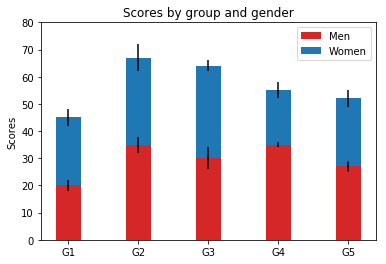

In [1]:
# a stacked bar plot with errorbars
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, color='#d62728', yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [2]:
#importing required modules 
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#creating column names
#loading csv file into a dataframe and assigning columns names as well
tbl_cols = ['draw_dt', 'first_num', 'second_num', 'third_num', 'fourth_num', 'fifth_num', 'mega_ball']
mm_tbl = pd.read_csv('winning_numbers_by_date_pd.txt',  header=None, names=tbl_cols, parse_dates=['draw_dt'])

mm_tbl.loc[mm_tbl['draw_dt'].dt.dayofweek == 1.0, 'next_draw_dt'] = mm_tbl['draw_dt'] + datetime.timedelta(3)
mm_tbl.loc[mm_tbl['draw_dt'].dt.dayofweek == 4.0, 'next_draw_dt'] = mm_tbl['draw_dt'] + datetime.timedelta(4)

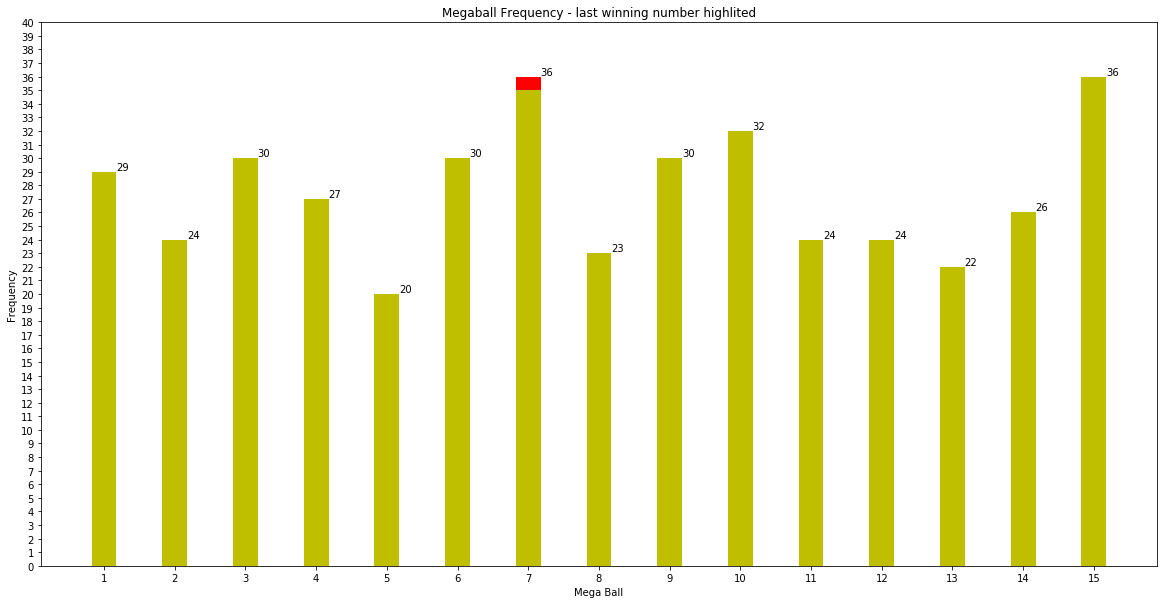

In [51]:
freq_tble = mm_tbl['mega_ball'].value_counts()
for i in range(1,16):
    if freq_tble.get(i) == None:
        freq_tble[i] = 0
        
x = freq_tble.sort_index().index
y1 = freq_tble.sort_index().values

mx = freq_tble.describe()['max']

freq_tble = pd.Series(mm_tbl.loc[mm_tbl['draw_dt'].idxmax()]['mega_ball']).value_counts()
for i in range(1,16):
    if freq_tble.get(i) == None:
        freq_tble[i] = 0
        
y2 = freq_tble.sort_index().values    

N = 15

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
p1 = ax.bar(ind, y1, width, color='y')
p2 = ax.bar(ind, y2, width, bottom=y1-1,color='r')

plt.xlabel('Mega Ball')
plt.ylabel('Frequency')
plt.title('Megaball Frequency - last winning number highlited')
plt.xticks(ind,ind+1)
plt.yticks(np.arange(0, mx + 5))

def autolabel(rects):
    for rect in rects:
        ax.text(rect.get_x() + rect.get_width()*1.25, 
                rect.get_height(), 
                int(rect.get_height()), 
                ha='center', 
                va='bottom')

autolabel(p1)


plt.show()